# Importing modules and libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data

### Load training and test data

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

### Split the training data into features and labels

In [3]:
X_train = train.drop('label', axis=1).values
y_train = train['label'].values

### Normalize the pixel values to be between 0 and 1

In [4]:
X_train = X_train / 255.0

### One-hot encode the labels

In [5]:
y_train = to_categorical(y_train, 10)

### Reshape the input data to 28x28x1 (grayscale images)

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1)

### Load test data and preprocess similarly

In [7]:
X_test = test.values / 255.0  # Normalize test data
X_test = X_test.reshape(-1, 28, 28, 1)  # Reshape test data to 28x28x1

# Step 2: Define the CNN Model

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer with 32 filters, 3x3 kernel, ReLU activation
    MaxPooling2D((2, 2)),  # MaxPooling to downsample the feature maps                            
    
    Conv2D(64, (3, 3), activation='relu'), # Second convolutional layer with 64 filters, 3x3 kernel, ReLU activation
    MaxPooling2D((2, 2)), # MaxPooling to further downsample
    
    Conv2D(64, (3, 3), activation='relu'), # Third convolutional layer with 64 filters, 3x3 kernel, ReLU activation
    
    Flatten(), # Flatten the 3D feature maps to a 1D vector for the fully connected layer
    
    Dense(64, activation='relu'), # Fully connected layer with 64 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units (one for each digit) and softmax activation
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 3: Compile the Model

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the Model

In [10]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8477 - loss: 0.4688 - val_accuracy: 0.9761 - val_loss: 0.0780
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9810 - loss: 0.0589 - val_accuracy: 0.9860 - val_loss: 0.0438
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9875 - loss: 0.0395 - val_accuracy: 0.9818 - val_loss: 0.0606
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9889 - loss: 0.0323 - val_accuracy: 0.9863 - val_loss: 0.0444
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9919 - loss: 0.0230 - val_accuracy: 0.9851 - val_loss: 0.0556
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.9863 - val_loss: 0.0521
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9939 - loss: 0.0172 - val_accuracy: 0.9876 - val_loss: 0.0463
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9959 -

# Step 5: Evaluate the Model

In [11]:
test_loss, test_acc = model.evaluate(X_train, y_train)
print('Test accuracy:', test_acc)


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9982 - loss: 0.0067
Test accuracy: 0.996404767036438


# Step 6: Make Predictions on Test Data

In [12]:

predictions = model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


### Convert predictions from probabilities to actual digit labels

In [13]:
predicted_labels = np.argmax(predictions, axis=1)

# Step 7: Prepare the Submission File
### Create the submission dataframe

In [14]:
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),  # ImageId from 1 to 28000
    'Label': predicted_labels  # Predicted labels
})

### Save the submission file in the correct format

In [15]:
submission.to_csv('submission.csv', index=False)

### Visualize some of the predictions

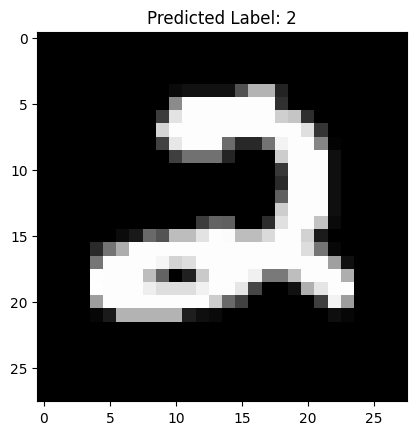

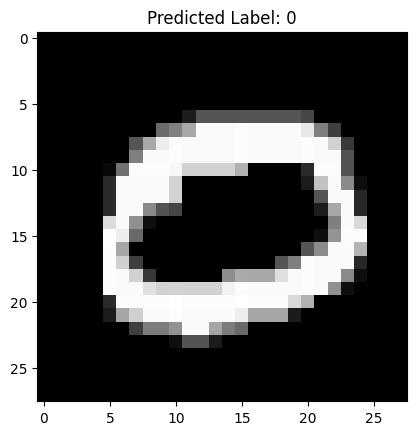

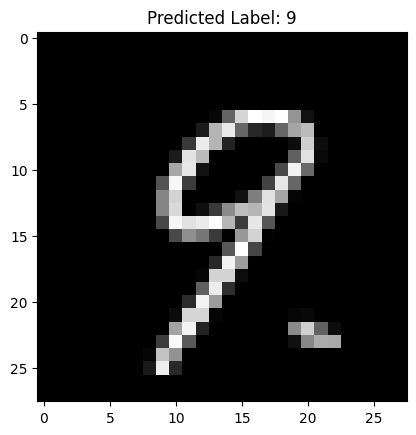

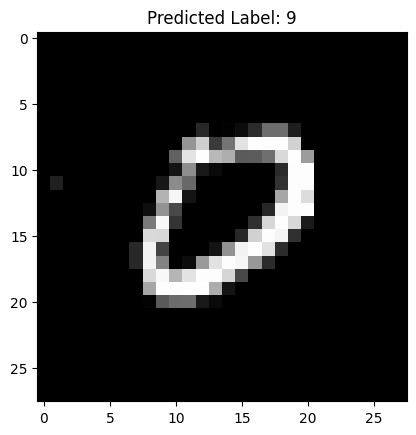

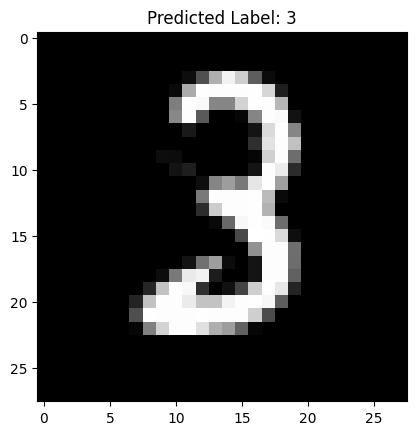

In [16]:
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Label: {predicted_labels[i]}')
    plt.show()

### Reading and displaying predicitve results

In [17]:
submission_df = pd.read_csv("/kaggle/working/submission.csv")
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
